# Rainfall Prediction

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

# Importing Dataset

In [3]:
df = pd.read_csv("/rainfall in india 1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [5]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [6]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['SUBDIVISION'].value_counts()

WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH                

In [9]:
df.mean(numeric_only=True)

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [10]:
# filling na values with mean
df = df.fillna(df.mean(numeric_only=True))

In [11]:
df.head(25)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.200000,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.60000,3373.2000,136.3,560.300000,1696.3,980.300000
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.200000,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.50000,3520.7000,159.8,458.300000,2185.9,716.700000
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.000000,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.00000,2957.4000,156.7,236.100000,1874.0,690.600000
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.000000,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.10000,3079.6000,24.1,506.900000,1977.6,571.000000
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.300000,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.70000,2566.7000,1.3,309.700000,1624.9,630.800000
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.000000,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.20000,2534.4000,36.6,556.100000,1465.8,475.900000
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.300000,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.60000,3347.9000,110.7,751.200000,1327.1,1158.900000
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.000000,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.90000,3576.4000,106.0,591.000000,2303.7,575.700000
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.300000,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.50000,2899.4000,49.3,520.100000,1701.0,629.000000
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.000000,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.10000,2687.2000,8.4,449.800000,1553.6,675.400000


In [12]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [13]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909])

In [14]:
df.shape

(4116, 19)

## Data Visualization

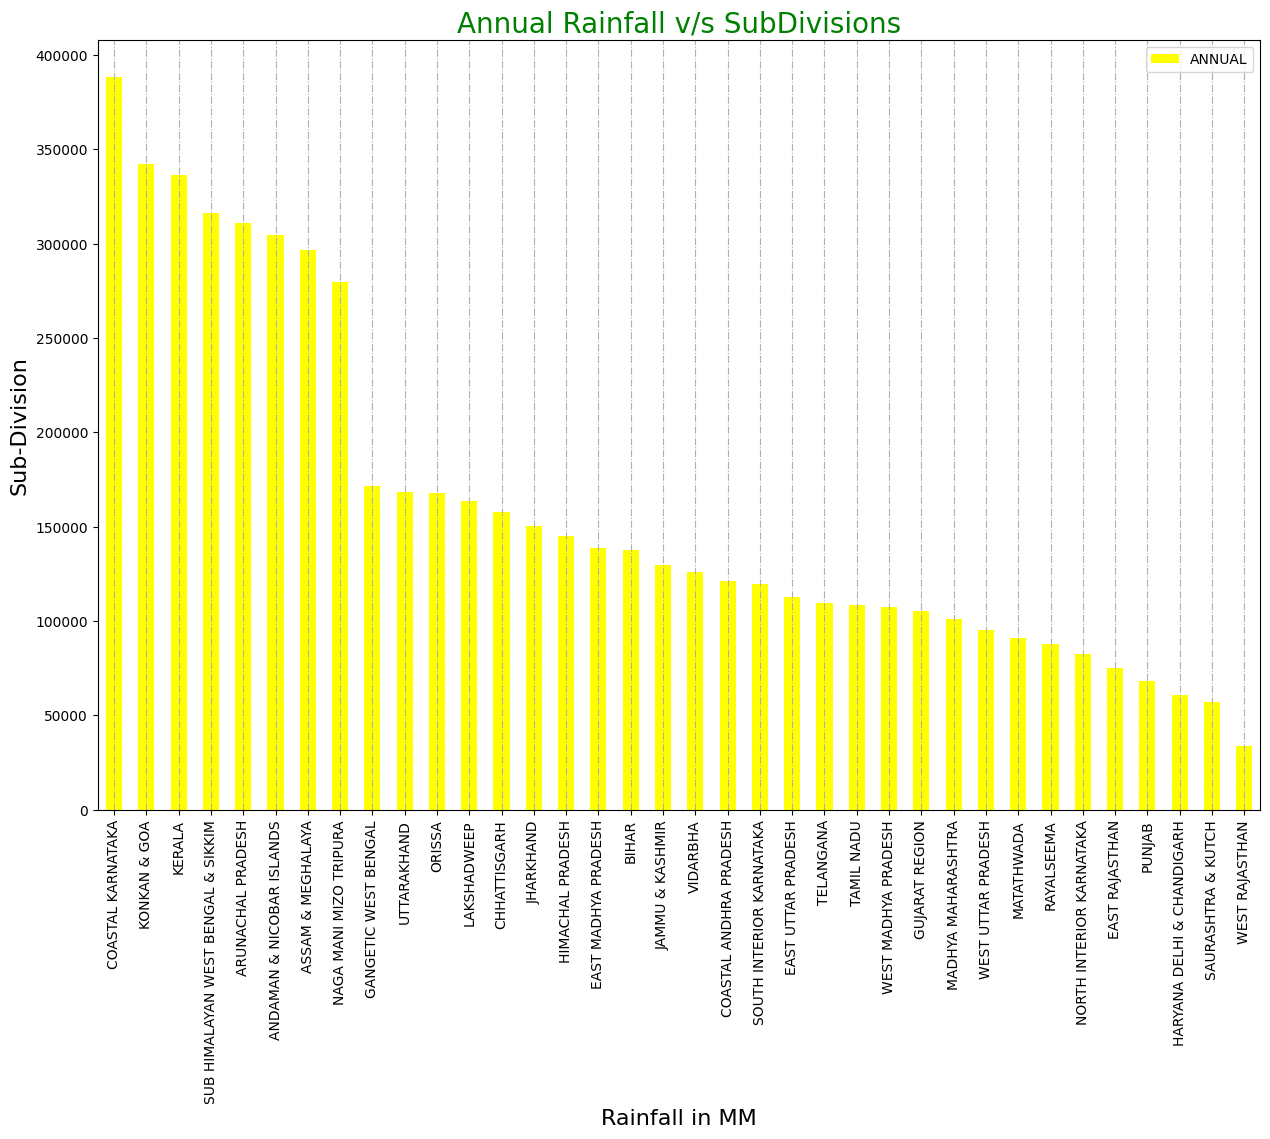

In [42]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='bar',stacked=True,figsize=(15,10),color='yellow')
plt.xlabel("Rainfall in MM",size=16)
plt.ylabel("Sub-Division",size=16)
plt.title("Annual Rainfall v/s SubDivisions",color='green',fontsize=20)
plt.grid(axis="x",linestyle="-.")
plt.show()

<ipython-input-54-baa2d2148b63>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")


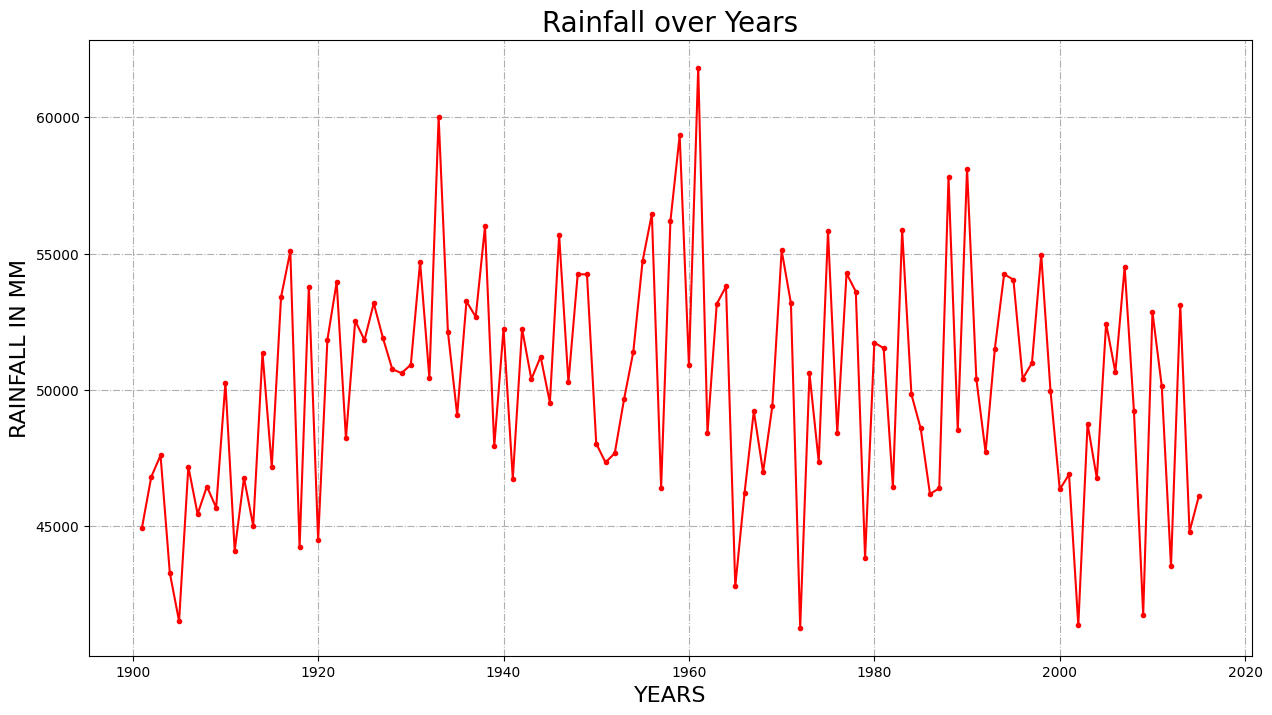

In [54]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=16)
plt.ylabel("RAINFALL IN MM",size=16)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years",fontsize=20)
plt.show()

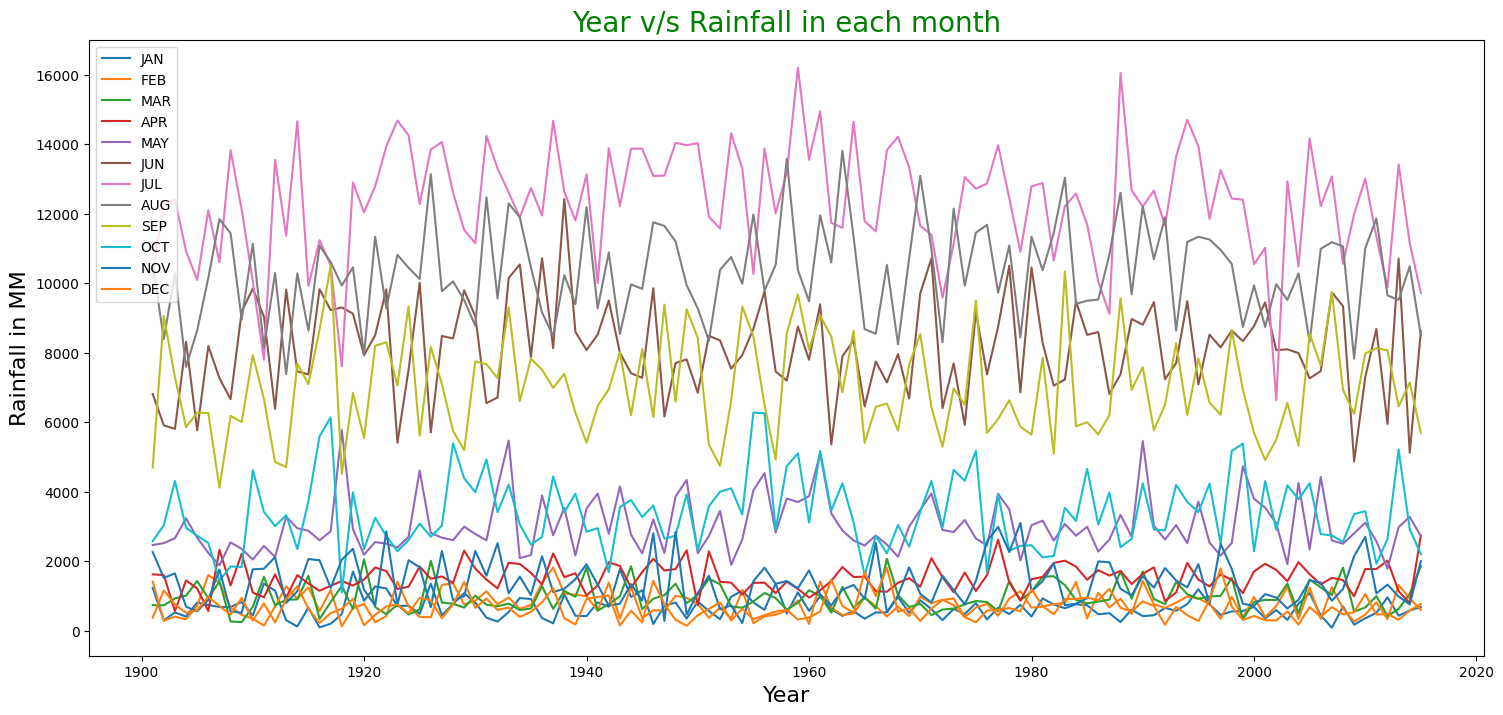

In [53]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=16)
plt.ylabel("Rainfall in MM",size=16)
plt.title("Year v/s Rainfall in each month",fontsize=20,color='g')
plt.show()

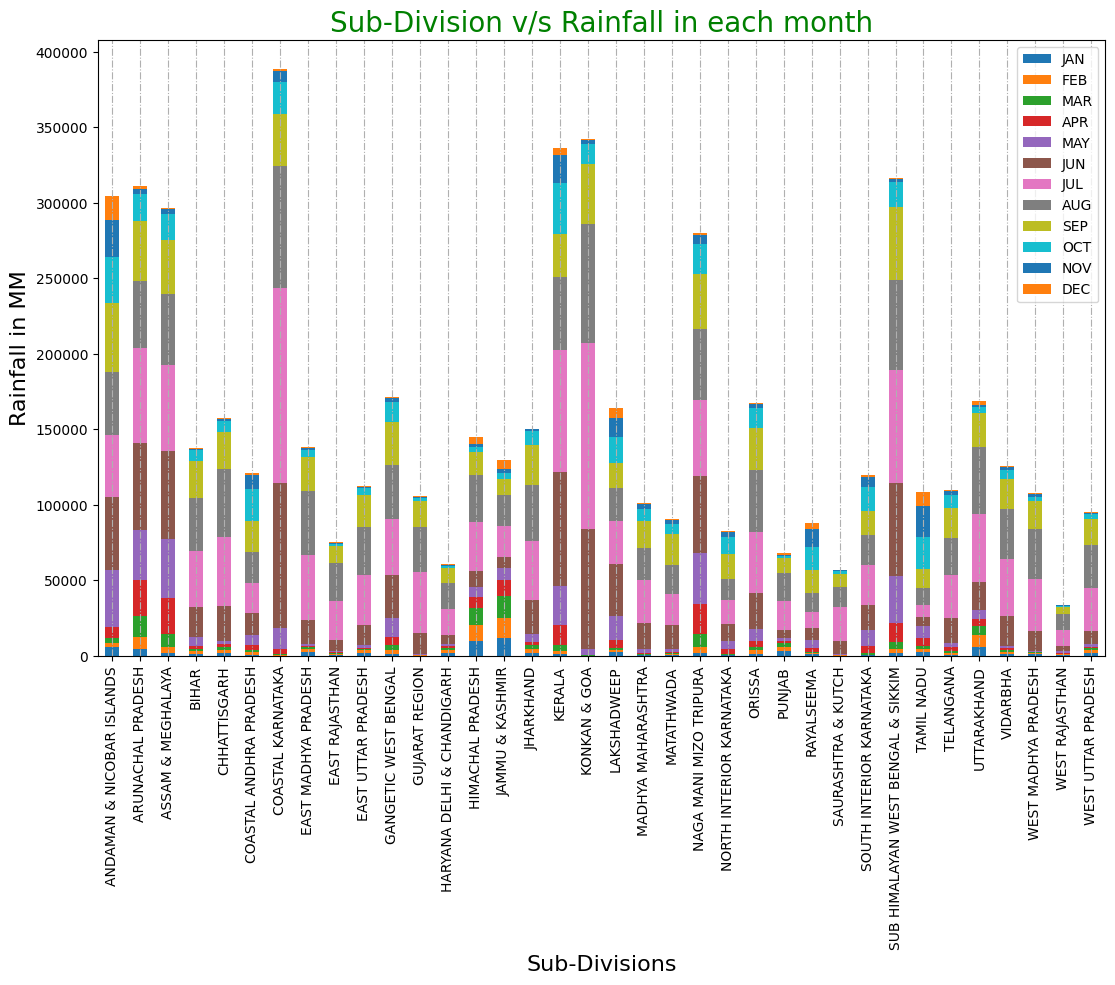

In [59]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="bar",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month",size=20,color="g")
plt.xlabel("Sub-Divisions",size=16)
plt.ylabel("Rainfall in MM",size=16)
plt.grid(axis="x",linestyle="-.")
plt.show()

## Analysis of rainfall data of TELANGANA

In [60]:
V = df.loc[((df['SUBDIVISION'] == 'TELANGANA'))]
V.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3197,TELANGANA,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7,48.7,75.0,616.4,87.7
3198,TELANGANA,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4,0.0,18.2,532.0,80.2
3199,TELANGANA,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4,17.5,50.5,1042.9,172.4
3200,TELANGANA,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7,0.0,26.3,456.0,44.4
3201,TELANGANA,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9,4.3,72.6,628.4,19.6


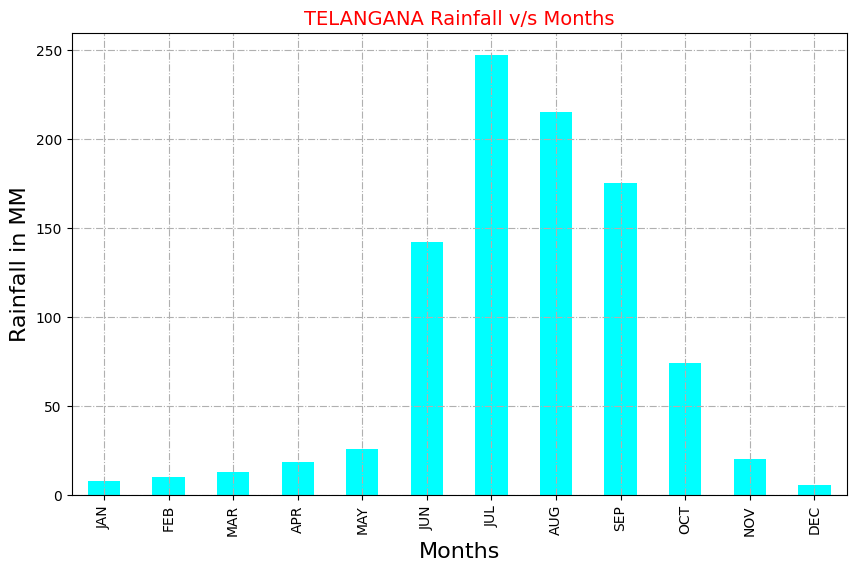

In [62]:
plt.figure(figsize=(10,6))
V[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2,color="cyan")
plt.title("TELANGANA Rainfall v/s Months",size=14,color="r")
plt.xlabel("Months",size=16)
plt.ylabel("Rainfall in MM",size=16)
plt.grid(axis="both",linestyle="-.")
plt.show()

<ipython-input-76-1f26c89436e3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));


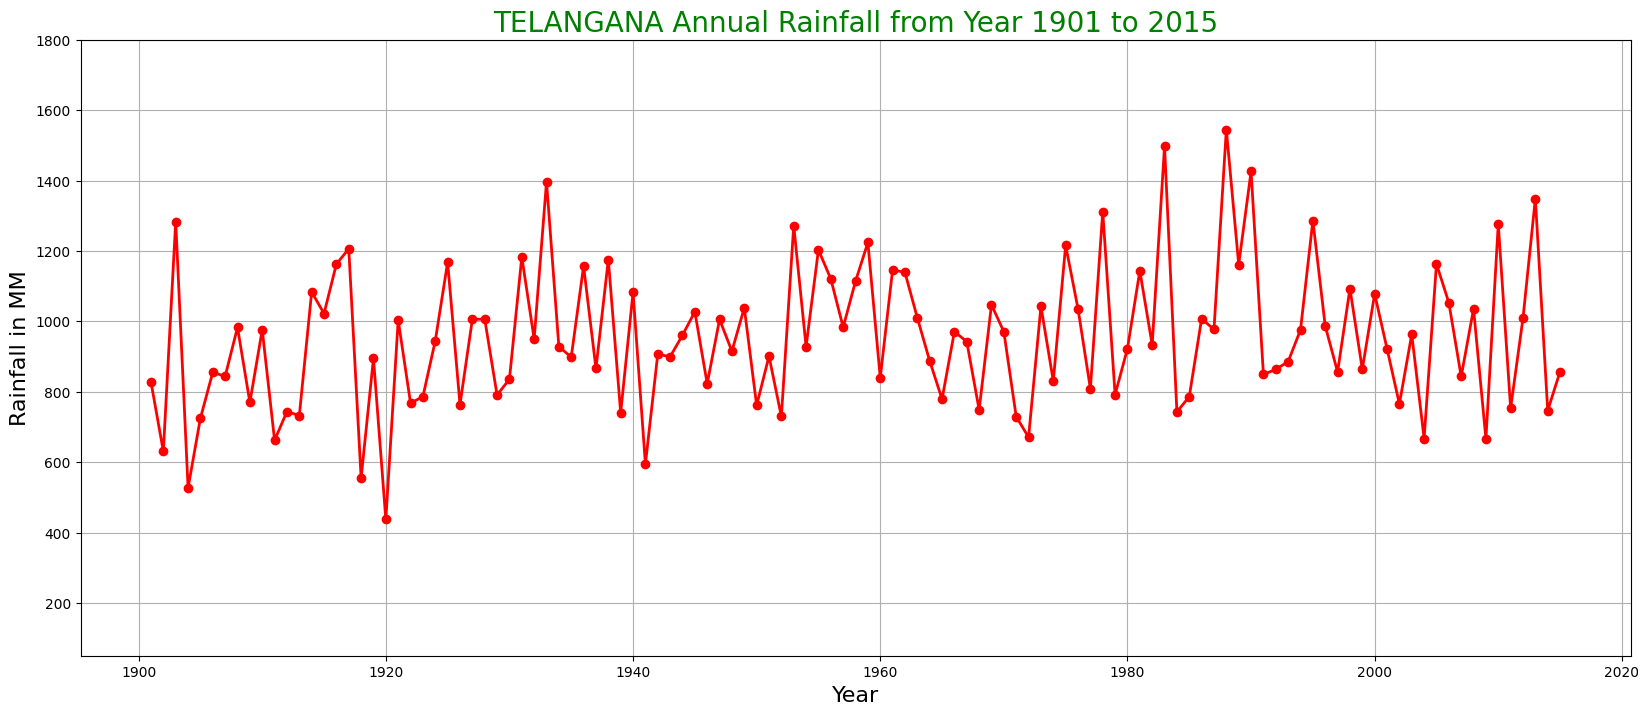

In [76]:
V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));
plt.xlabel('Year',size=16)
plt.ylabel('Rainfall in MM',size=16)
plt.title('TELANGANA Annual Rainfall from Year 1901 to 2015',size=20,color="g")
plt.grid()
plt.show()

In [66]:
group = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df=group.get_group(('TELANGANA'))
df.head()

<ipython-input-66-da2dd71c6f98>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3197,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0
3198,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3
3199,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1
3200,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0
3201,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0


In [67]:
df2=df.melt(['YEAR']).reset_index()
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,6.9
1,1,1902,JAN,0.0
2,2,1903,JAN,12.9
3,3,1904,JAN,0.0
4,4,1905,JAN,0.0


In [68]:
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,6.9
115,115,1901,FEB,41.8
230,230,1901,MAR,7.8
345,345,1901,APR,45.2
460,460,1901,MAY,22.0


In [69]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [70]:
df2.columns=['Index','Year','Month','Avg_Rainfall']

In [71]:
df2.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,6.9
115,115,1901,FEB,41.8
230,230,1901,MAR,7.8
345,345,1901,APR,45.2
460,460,1901,MAY,22.0


In [72]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,6.9
115,115,1901,2,41.8
230,230,1901,3,7.8
345,345,1901,4,45.2
460,460,1901,5,22.0
575,575,1901,6,123.6
690,690,1901,7,237.8
805,805,1901,8,177.2
920,920,1901,9,77.7
1035,1035,1901,10,75.5


In [73]:
df2.drop(columns="Index",inplace=True)

In [74]:
df2.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,6.9
115,1901,2,41.8


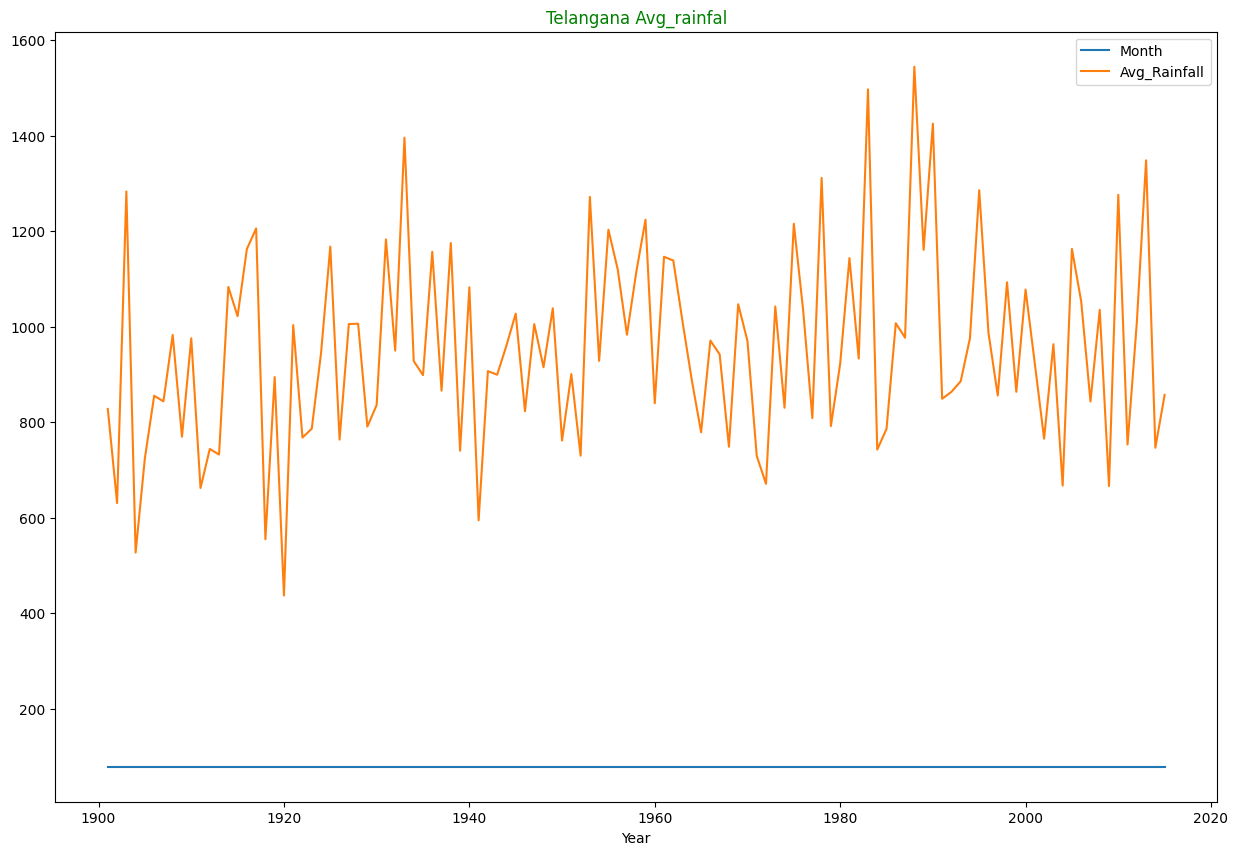

In [79]:
df2.groupby("Year").sum().plot(figsize=(15,10))
plt.title("Telangana Avg_rainfal",color="g")
plt.show()

In [80]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int')

In [81]:
X

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       ...,
       [2015,   10],
       [2015,   11],
       [2015,   12]])

In [82]:
X[:15]

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       [1901,    4],
       [1901,    5],
       [1901,    6],
       [1901,    7],
       [1901,    8],
       [1901,    9],
       [1901,   10],
       [1901,   11],
       [1901,   12],
       [1902,    1],
       [1902,    2],
       [1902,    3]])

In [83]:
y

array([ 6, 41,  7, ..., 15,  0,  1])

In [84]:
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


# splitting the dataset into training and testing

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [86]:
X_train

array([[1959,    4],
       [1986,   10],
       [1993,    4],
       ...,
       [1944,   12],
       [1996,   10],
       [2008,    6]])

In [87]:
y_train

array([  4,  24,  13, ...,   0,  72, 132])

# LINEAR REGRESSION MODEL

In [88]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [89]:
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [90]:
print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)


-----Training Accuracy-------
6.0
-----Testing Accuracy--------
4.0


In [92]:
predicted = LR.predict([[2014,2]])
predicted

array([52.67112349])

### Random Forest Model

In [93]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [94]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [95]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
81.6
-----------Testing Accuracy------------
68.5


In [96]:
predicted = random_forest_model.predict([[2014,2]])
predicted

array([21.72052152])